In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

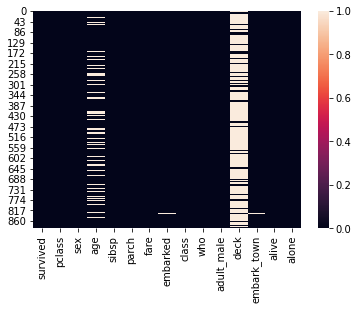

In [5]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(data.isnull())

# display the plot
plt.show()

In [8]:
# Replace null value in age column
data['age']=data['age'].fillna(data['age'].mean())
#sns.heatmap(data.isnull())

Replace null values  Replace null value in embarked and fare classes with mode. or median.

In [25]:
## Replace null value in embarked and fare classes with mode or median
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

data.info()
data["embarked"].values

data["embarked"] = encoder.fit_transform(data["embarked"])
data.info()

data["embarked"].fillna(data["embarked"].mean() , inplace=True)

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Question -- Drop fare column.

In [29]:
data.drop('fare',axis=1)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,2,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,2,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,2,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,2,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,0,First,man,True,C,Cherbourg,yes,True


In [30]:
#print the frequency of embarked
data['embarked'].value_counts()


2    644
0    168
1     77
3      2
Name: embarked, dtype: int64

Question - - Average age of the woman passengers:




In [98]:


data[data["who"] == "woman"].age.mean()

32.0

Question -- Average age of the male passengers.

In [36]:
 data[data["sex"] == "male"].age.mean()
 

30.72664459161148

Question -- The max age among the male passengers:

In [37]:
 data[data["sex"] == "male"].age.max()

80.0

Question -- Create a new column age2 = age +12

In [39]:
 data["age2"] = data["age"] + 2
 data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False,24.0
1,1,1,female,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False,40.0
2,1,3,female,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True,28.0
3,1,1,female,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False,37.0
4,0,3,male,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True,37.0


Question -- The min age among the female passengers:

In [105]:
  data[data["sex"] == "female"].age.min()

0.75

Question -- The min age among the alive male passengers.

In [43]:
data[((data["sex"] == "male") & (data["alive"] == "yes"))].age.min() 

0.42

Question -- Average age of the **male** passengers in First or Second class:

In [49]:
#Rename columns class
data[((data["sex"] == "male") & ((data["class"]== "First") | (data["class"]== "Second")))].age.mean()

36.06375

Question -- Total age of embarked equals to S or C.

In [111]:
 data_ = sns.load_dataset('titanic')
 data_[((data_["embarked"]=='S')|(data_["embarked"]=='C'))].age.sum()


20318.67

Question -- Sort the DataFrame in ascending order of the 'age' use sort values (df.sort_values(by='...', ascending=...)).

In [60]:
data.sort_values(by="age",ascending=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
803,1,3,male,0.42,0,1,8.5167,0,Third,child,False,NaN,Cherbourg,yes,False,2.42
755,1,2,male,0.67,1,1,14.5000,2,Second,child,False,NaN,Southampton,yes,False,2.67
644,1,3,female,0.75,2,1,19.2583,0,Third,child,False,NaN,Cherbourg,yes,False,2.75
469,1,3,female,0.75,2,1,19.2583,0,Third,child,False,NaN,Cherbourg,yes,False,2.75
78,1,2,male,0.83,0,2,29.0000,2,Second,child,False,NaN,Southampton,yes,False,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,0,Third,man,True,NaN,Cherbourg,no,True,NaN
863,0,3,female,NaN,8,2,69.5500,2,Third,woman,False,NaN,Southampton,no,False,NaN
868,0,3,male,NaN,0,0,9.5000,2,Third,man,True,NaN,Southampton,no,True,NaN
878,0,3,male,NaN,0,0,7.8958,2,Third,man,True,NaN,Southampton,no,True,NaN


**Aggregating**


Documentation : https://pbpython.com/groupby-agg.html


Aggregation function is one which takes multiple individual values and returns a summary.

The most common aggregation functions are a simple average or summation of values.

Here’s a quick example of calculating the total and average fare using the Titanic dataset (loaded from seaborn):

Question -- Average age for each embark_town. Use the groupby() method.


In [63]:
data.groupby("embark_town").age.mean()

embark_town
Cherbourg      30.814769
Queenstown     28.089286
Southampton    29.445397
Name: age, dtype: float64

Average age of each embark_town. Use the pivot_table() method.


Pivot Table

Documentation : 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [68]:
 pd.pivot_table(data,values="age",index="embark_town" ,aggfunc=np.mean )

,age
embark_town,
Cherbourg,30.814769
Queenstown,28.089286
Southampton,29.445397


Question -- Average age and age2 for each embark_town. Use the groupby() method. 

In [83]:
data.groupby("embark_town")["age" ,"age2"].mean()

C:\Users\Rania\AppData\Local\Temp/ipykernel_22192/3161054639.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("embark_town")["age" ,"age2"].mean()


,age,age2
embark_town,,
Cherbourg,30.814769,32.814769
Queenstown,28.089286,30.089286
Southampton,29.445397,31.445397


Question -- Total age for each embark_town and class in one code sentence. Use the pivot_table() method. Fill the missing values with 0.

In [87]:
 pd.pivot_table(data,values="age",index=["embark_town","class"] ,aggfunc=np.mean,fill_value=0 ) 


age
embark_town class            
Cherbourg   First   38.027027
            Second  22.766667
            Third   20.741951
Queenstown  First   38.500000
            Second  43.500000
            Third   25.937500
Southampton First   38.152037
            Second  30.386731
            Third   25.696552

In [88]:
  pd.pivot_table(data,values="age",index=["embark_town"],columns=["class"] ,aggfunc=np.mean,fill_value=0 ) 

class,First,Second,Third
embark_town,,,
Cherbourg,38.027027,22.766667,20.741951
Queenstown,38.500000,43.500000,25.937500
Southampton,38.152037,30.386731,25.696552


Total age2 of age equal to 22 and 38:

In [177]:

data[((data.age == 22) | (data.age == 38))].age.sum()


1012.0

Question -- Print a frequency table of 'who' use 'value_counts()'


In [90]:
data["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

Question -- Sort the DataFrame in ascending order of the 'embark_town'. Show the top 20.

In [93]:
data_.sort_values(by="embark_town",ascending=True).head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.00,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
125,1,3,male,12.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
354,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
352,0,3,male,15.00,1,1,7.2292,C,Third,child,False,NaN,Cherbourg,no,False
128,1,3,female,NaN,1,1,22.3583,C,Third,woman,False,F,Cherbourg,yes,False
641,1,1,female,24.00,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True
130,0,3,male,33.00,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
798,0,3,male,30.00,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
645,1,1,male,48.00,1,0,76.7292,C,First,man,True,D,Cherbourg,yes,False
